In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

np.random.seed(42)

# plt.style.use("seaborn-v0_8-whitegird")

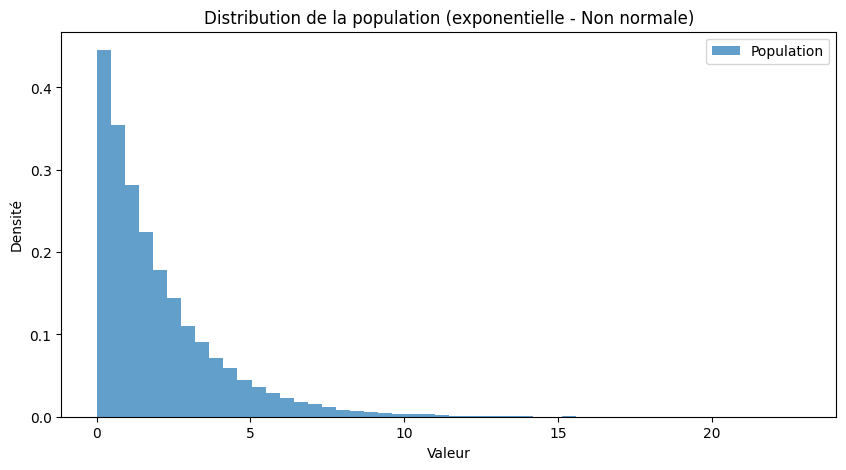

Moyenne de la population 2.01
Ecart-type de la population 2.01


In [4]:
population_size = 100000
population = stats.expon.rvs(scale=2, size=population_size)

fig, ax = plt.subplots(figsize=(10,5))

ax.hist(population, bins=50, density=True, alpha=0.7, label='Population')
ax.set_xlabel('Valeur')
ax.set_ylabel('Densité')

ax.set_title("Distribution de la population (exponentielle - Non normale)")

ax.legend()
plt.show()

print(f"Moyenne de la population {np.mean(population):.2f}")
print(f"Ecart-type de la population {np.std(population):.2f}")

In [5]:
def simulate_sampling(population, sample_size, n_samples=1000):
    """Tire n_samples échantillons et retourne leurs moyennes."""
    means = []
    for _ in range(n_samples):
        sample = np.random.choice(population, size=sample_size, replace=True)
        means.append(np.mean(sample))
    return np.array(means)

In [6]:
sample_sizes= [5, 10, 30, 100]
n_simulations = 2000
results = {}
for n in sample_sizes:
    results[n] = simulate_sampling(population, n, n_simulations)
    print(f"n={n}, Moyenne des moyennes = {np.mean(results[n]):.3f}, Ecart-type = {np.std(results[n]):.3f}")

n=5, Moyenne des moyennes = 1.993, Ecart-type = 0.880
n=10, Moyenne des moyennes = 2.017, Ecart-type = 0.621
n=30, Moyenne des moyennes = 2.013, Ecart-type = 0.374
n=100, Moyenne des moyennes = 2.010, Ecart-type = 0.202


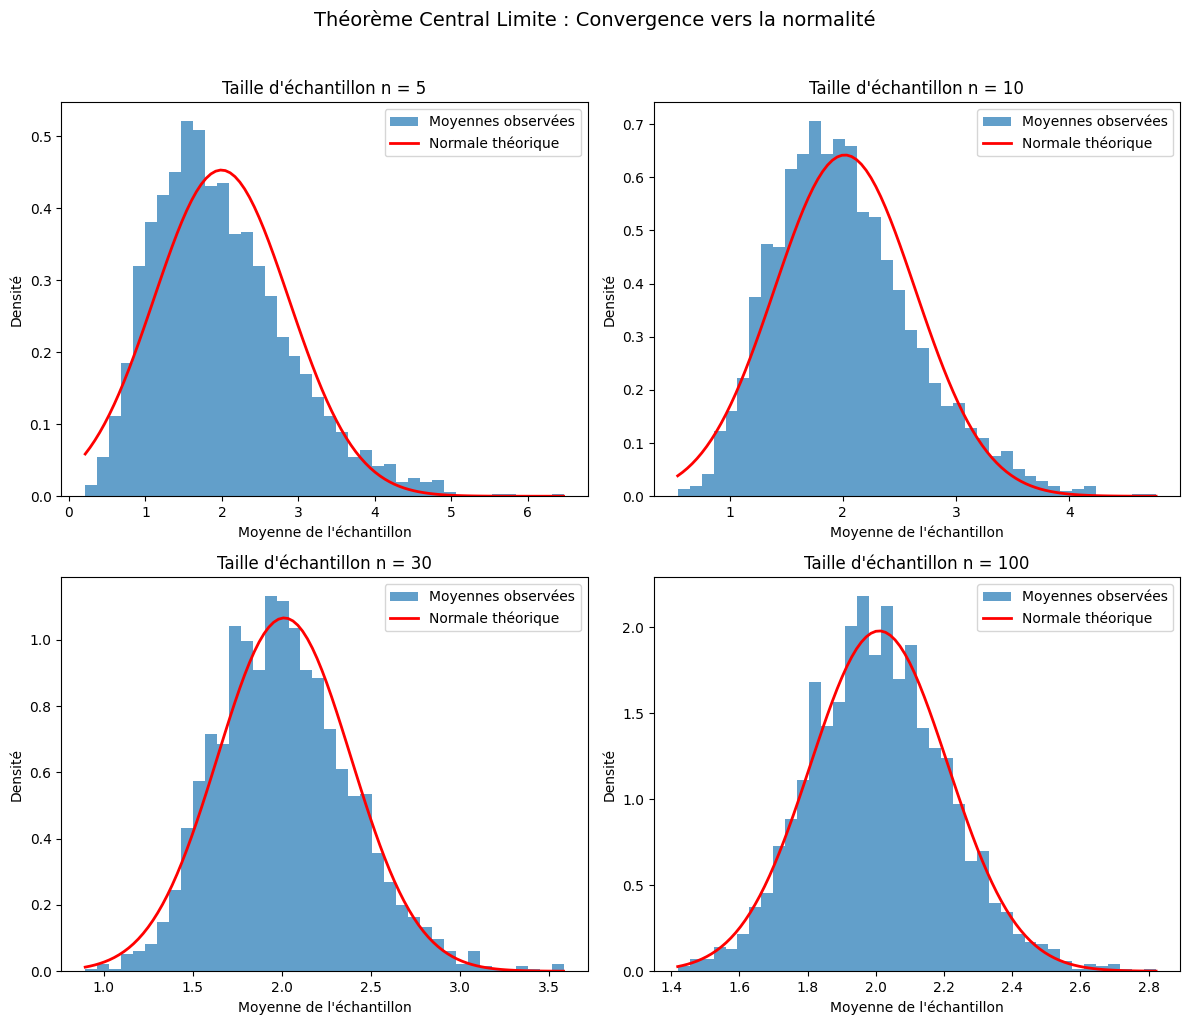

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, n in enumerate(sample_sizes):
    ax = axes[idx]
    
    # Histogramme des moyennes
    ax.hist(results[n], bins=40, density=True, alpha=0.7, label='Moyennes observées')
    
    # Superposer la courbe normale théorique
    x = np.linspace(results[n].min(), results[n].max(), 100)
    mu = np.mean(results[n])
    sigma = np.std(results[n])
    ax.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', lw=2, label='Normale théorique')
    
    ax.set_xlabel('Moyenne de l\'échantillon')
    ax.set_ylabel('Densité')
    ax.set_title(f'Taille d\'échantillon n = {n}')
    ax.legend()

plt.suptitle('Théorème Central Limite : Convergence vers la normalité', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()